In [ ]:
def calculate_complexity_attn(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)

    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity

def calculate_complexity_mlp(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 8 * N * D * D  # O(8ND^2)

    # 总复杂度
    total_complexity = part1
    return total_complexity

def calculate_complexity_moha(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 3 * k * D * H * d  # O(3NDHd)
    part2 = H * k**2 * d        # O(HN^2d)
    part3 = H * k**2 * d        # O(HN^2d)
    part4 = k * H * d * D       # O(NHdD)

    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity * E

# 输入值
capacity = 2
config = [
    {
        'N':256,
        'H':6, 'D':384,'d':384 // 6, 
        'k':16 * capacity, 
        'E':16,
    },
    {
        'N':256, 
        'H':12, 'D':768, 'd':768 // 12,
        'k':16 * capacity, 
        'E':16,

    },
    {
        'N':256,
        'H':16, 'D':1024, 'd':1024 // 16,
        'k':16 * capacity, 
        'E':16,

    },
    {
        'N':256,
        'H':16, 'D':1152, 'd':1152 // 16,
        'k':16 * capacity, 
        'E':16,
    },
]


# 计算复杂度
for i in range(4):
    result_attn = calculate_complexity_attn(**config[i])
    result_mlp = calculate_complexity_mlp(**config[i])
    result_moba = calculate_complexity_moha(**config[i])
    print(f"Mlp复杂度为:  {result_mlp/1000_000}")
    print(f"Attn复杂度为: {result_attn/1000_000} MoHA复杂度为:  {result_moba/1000_000}")

In [ ]:
config = [
    {
        'N':1024,
        'H':6, 'D':384,'d':384 // 6, 
        'k':64 * capacity, 
        'E':16,
    },
    {
        'N':1024, 
        'H':12, 'D':768, 'd':768 // 12,
        'k':64 * capacity, 
        'E':16,

    },
    {
        'N':1024,
        'H':16, 'D':1024, 'd':1024 // 16,
        'k':64 * capacity, 
        'E':16,

    },
    {
        'N':1024,
        'H':16, 'D':1152, 'd':1152 // 16,
        'k':64 * capacity, 
        'E':16,
    },
]


# 计算复杂度
for i in range(4):
    result_attn = calculate_complexity_attn(**config[i])
    result_mlp = calculate_complexity_mlp(**config[i])
    result_moba = calculate_complexity_moha(**config[i])
    print(f"Mlp复杂度为:  {result_mlp/1000_000}")
    print(f"Attn复杂度为: {result_attn/1000_000} MoHA复杂度为:  {result_moba/1000_000}")

In [ ]:
def calculate_complexity_3dattn_tokenmerge(H, D, d, N):
    # 计算各个部分
    N = N // 4
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)
    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity

def calculate_complexity_2dattn(H, D, d, N):
    # 计算各个部分
    T = 20
    N = N / T
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)
    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity * T

def calculate_complexity_swiglu(H, D, d, N):
    # 维度映射关系（默认mult=4, scale=1）
    inner_dim = 4 * D  # linear1和linear2的输出维度
    # 三线性层计算量分解
    part1 = N * D * inner_dim   # linear1投影 (N×D→N×4D)
    part2 = N * D * inner_dim   # linear2投影 (N×D→N×4D)
    part3 = N * inner_dim * D   # linear3投影 (N×4D→N×D)
    # 总复杂度（保持与标准FFN对比基准）
    total_complexity = part1 + part2 + part3  # O(12ND²) 复杂度
    return total_complexity

capacity_here = 1
config = [
    {
        'N':1920 * 1080 / 8/2 / 8/2 * 20,
        'H':16, 'D':1152, 'd':1152 // 16,
    },
]
# 计算复杂度
for i in range(1):
    result_3dattn = calculate_complexity_3dattn_tokenmerge(**config[i])
    result_2dattn = calculate_complexity_2dattn(**config[i])
    result_mlp = calculate_complexity_swiglu(**config[i])
    print(f"swiglu复杂度为:  {result_mlp/1000_000}")
    print(f"3dAttn复杂度为: {result_3dattn/1000_000} 2dAttn复杂度为: {result_2dattn/1000_000}")

In [ ]:
1920 * 1080 / 8/2 / 8/2 * 20

In [ ]:
1920 * 1080 / 8/2 / 8/2 * 20 / 4

In [ ]:
1920 * 1080 / 8/2 / 8/2 * 20 / 20

In [ ]:
import torch
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jensenshannon

# 假设隐藏状态的形状是 [1000, 120, 4096]
hidden_states = torch.load("/ytech_m2v2_hdd/sml/DiffMoE_research_local/text_feature.pt")
hidden_states[0, :100, :]

In [ ]:

# 设定聚类类别数
n_clusters = 10

# 用于存储每个 prompt 的聚类标签分布
prompt_cluster_distributions = []

# 对每个 prompt 的 token 特征进行聚类
for i in range(hidden_states.shape[0]):
    # 提取当前 prompt 的 token 特征，形状为 [120, 4096]
    tokens = hidden_states[i].cpu().numpy()
    
    # 使用 K-Means 聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tokens)
    
    # 计算聚类标签的分布（直方图）
    hist, _ = np.histogram(cluster_labels, bins=n_clusters, range=(0, n_clusters))
    hist = hist / hist.sum()  # 归一化
    prompt_cluster_distributions.append(hist)

# 将聚类分布转换为 numpy 数组，形状为 [1000, n_clusters]
prompt_cluster_distributions = np.array(prompt_cluster_distributions)

# 计算 prompt 之间的相似度矩阵
similarity_matrix = np.zeros((1000, 1000))

for i in range(1000):
    for j in range(1000):
        # 使用 Jensen-Shannon 距离计算分布之间的相似度
        js_distance = jensenshannon(prompt_cluster_distributions[i], prompt_cluster_distributions[j])
        similarity_matrix[i][j] = 1 - js_distance  # 将距离转换为相似度

# 打印相似度矩阵
print(similarity_matrix)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置画布大小
plt.figure(figsize=(10, 8))

# 绘制热力图
sns.heatmap(
    similarity_matrix,
    cmap="YlOrRd",  # 颜色映射
    vmin=0,         # 最小值
    vmax=1,         # 最大值
    square=True,    # 使每个单元格为正方形
    xticklabels=50, # 每 50 个标签显示一个
    yticklabels=50  # 每 50 个标签显示一个
)

# 添加标题和标签
plt.title("Prompt Similarity Heatmap (Clustering-Based)", fontsize=16)
plt.xlabel("Prompt Index", fontsize=12)
plt.ylabel("Prompt Index", fontsize=12)

# 显示图形
plt.show()

In [ ]:
import torch
import timeit

# 原始函数
def find_value_indices_original(tensor, max_val):
    result = []
    for val in range(max_val):
        mask = (tensor == val)
        indices = torch.nonzero(mask, as_tuple=True)[0]
        result.append(indices)
    return result

# 优化后的函数
def find_value_indices_optimized(tensor, max_val):
    mask = tensor.unsqueeze(-1) == torch.arange(max_val, device=tensor.device)
    return [torch.where(mask[:, i])[0] for i in range(max_val)]

# 测试数据
def generate_test_data(size, max_val):
    return torch.randint(0, max_val, (size,)), max_val

# 测试函数性能
def test_performance():
    sizes = [1000, 10000, 100000]  # 测试不同大小的张量
    max_val = 10  # 假设最大值为 10
    repeat = 100  # 每个函数运行 100 次取平均

    for size in sizes:
        tensor, max_val = generate_test_data(size, max_val)
        
        # 测试原始函数
        time_original = timeit.timeit(
            lambda: find_value_indices_original(tensor, max_val),
            number=repeat
        ) / repeat

        # 测试优化后的函数
        time_optimized = timeit.timeit(
            lambda: find_value_indices_optimized(tensor, max_val),
            number=repeat
        ) / repeat

        print(f"Tensor size: {size}")
        print(f"Original function: {time_original:.6f} seconds per call")
        print(f"Optimized function: {time_optimized:.6f} seconds per call")
        print(f"Speedup: {time_original / time_optimized:.2f}x")
        print("---")

# 运行性能测试
test_performance()

In [ ]:
import torch

# 创建一个张量
x = torch.randn(1000000, 512).cuda()

# 测量 index_select 的执行时间
%timeit x.index_select(0, torch.randint(0, 1000000, (1024,)).cuda())

# 测量直接索引的执行时间
%timeit x[torch.randint(0, 1000000, (1024,)).cuda()]

In [ ]:
import torch
import timeit
import matplotlib.pyplot as plt
from typing import List

def method_loop(mask: torch.Tensor) -> List[torch.Tensor]:
    """基础循环方法"""
    expert_to_indices = []
    for expert_idx in range(mask.size(0)):
        positions = mask[expert_idx].nonzero(as_tuple=True)[0]
        expert_to_indices.append(positions)
    return expert_to_indices

def method_vectorized(mask: torch.Tensor) -> List[torch.Tensor]:
    """向量化split方法"""
    all_indices = mask.nonzero()
    if all_indices.size(0) == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    return torch.split(all_indices[:,1], mask.sum(dim=1).tolist())

def method_optimized(mask: torch.Tensor) -> List[torch.Tensor]:
    """unique+split优化方法"""
    expert_ids, positions = mask.nonzero(as_tuple=True)
    if expert_ids.numel() == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    
    sorted_ids, sort_idx = expert_ids.sort()
    counts = torch.bincount(sorted_ids, minlength=mask.size(0))
    return torch.split(positions[sort_idx], counts.tolist())

def generate_mask(E: int, L: int, sparsity: float, device='cpu') -> torch.Tensor:
    """生成指定稀疏度的随机掩码"""
    mask = torch.rand(E, L, device=device) < sparsity
    # 确保每行至少有一个非零元素
    mask[torch.arange(E, device=device), torch.randint(0, L, (E,), device=device)] = True
    return mask

def compare_results(ref: List[torch.Tensor], test: List[torch.Tensor]) -> bool:
    """安全的结果比较方法"""
    if len(ref) != len(test):
        return False
    for r, t in zip(ref, test):
        if r.device != t.device:
            t = t.to(r.device)
        if not torch.equal(r, t):
            return False
    return True

def run_benchmark(configs):
    # 测试配置
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Running on {device.upper()}")
    

    methods = {
        'Loop': method_loop,
        'Vectorized': method_vectorized,
        'Optimized': method_optimized
    }
    
    results = {name: [] for name in methods}
    
    for config in configs:
        print(f"\nBenchmarking E={config['E']}, L={config['L']}, sparsity={config['sparsity']}")
        mask = generate_mask(config['E'], config['L'], config['sparsity'], device)
        
        # 预热和同步
        _ = method_optimized(mask)
        if device == 'cuda':
            torch.cuda.synchronize()
        
        # 获取参考结果
        ref_result = method_loop(mask.cpu())
        
        for name, method in methods.items():
            try:
                # 计时
                def wrapper():
                    if device == 'cuda':
                        torch.cuda.synchronize()
                    return method(mask)
                
                times = timeit.repeat(wrapper, number=10, repeat=3)
                avg_time = sum(times) / len(times) / 10 * 1000  # 平均毫秒时间
                
                # 验证结果
                test_result = method(mask)
                if not compare_results(ref_result, test_result):
                    print(f"Validation failed for {name}!")
                    print("Reference:", [r.shape for r in ref_result])
                    print("Test:", [t.shape for t in test_result])
                    continue
                
                results[name].append(avg_time)
                print(f"{name:<10}: {avg_time:.4f} ms")
            
            except Exception as e:
                print(f"Error in {name}: {str(e)}")
                results[name].append(float('nan'))
    
    # 可视化结果
    plt.figure(figsize=(10, 5))
    x_labels = [f"E={c['E']}\nL={c['L']}\nsp={c['sparsity']}" for c in configs]
    
    for name, times in results.items():
        plt.plot(x_labels, times, marker='o', label=name)
    
    plt.title(f"Expert Assignment Benchmark ({device.upper()})")
    plt.ylabel("Execution Time (ms)")
    plt.xlabel("Configuration")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"expert_assignment_benchmark_{device}.png")
    plt.show()

if __name__ == "__main__":
    torch.manual_seed(42)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(42)

    configs = [
        {'E': 8, 'L': 1024, 'sparsity': 0.1},
        {'E': 16, 'L': 2048, 'sparsity': 0.05},
        {'E': 32, 'L': 256*32, 'sparsity': 0.05},
        {'E': 32, 'L': 256*32, 'sparsity': 1/32},
        {'E': 32, 'L': 256*32, 'sparsity': 0},
        {'E': 32, 'L': 256*32, 'sparsity': 1},
    ]

    run_benchmark(configs)

In [ ]:
def method_vectorized(mask: torch.Tensor) -> List[torch.Tensor]:
    """向量化split方法"""
    all_indices = mask.nonzero()
    if all_indices.size(0) == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    return torch.split(all_indices[:,1], mask.sum(dim=1).tolist())
config = configs[0]
mask = generate_mask(config['E'], config['L'], config['sparsity'])
len(method_vectorized(mask))

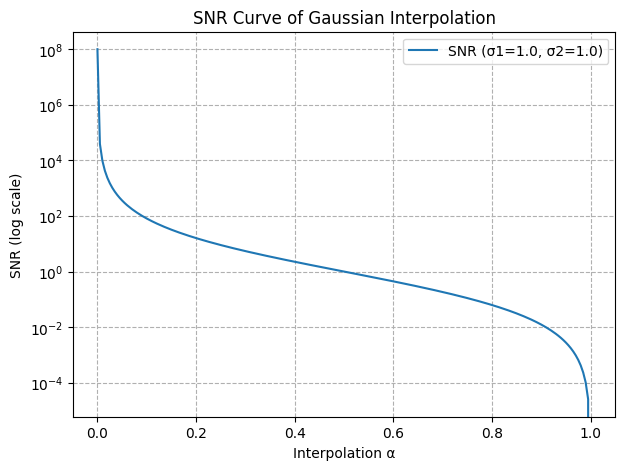

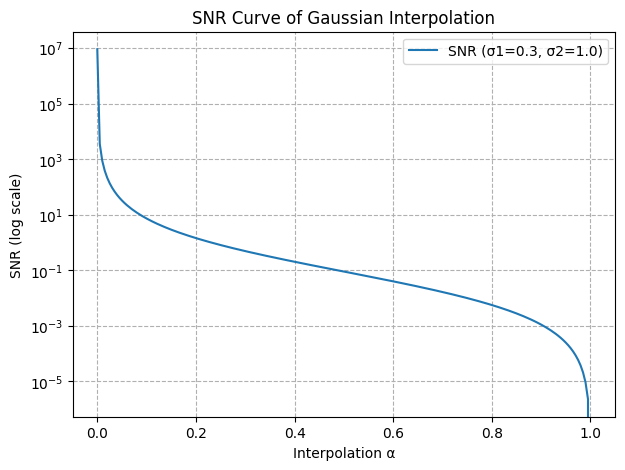

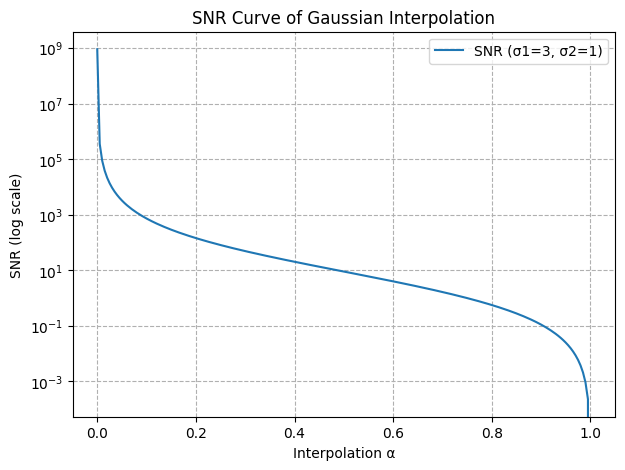

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_snr_curve(sigma1=1.0, sigma2=0.3, num_points=200):
    alphas = np.linspace(0, 1, num_points)
    
    # 信号 = (1-a)^2 σ1^2
    signal = (1 - alphas)**2 * sigma1**2
    # 噪声 = a^2 σ2^2
    noise = (alphas**2) * sigma2**2
    
    snr = signal / (noise + 1e-8)  # 避免除零

    plt.figure(figsize=(7,5))
    plt.plot(alphas, snr, label=f"SNR (σ1={sigma1}, σ2={sigma2})")
    plt.yscale("log")
    plt.xlabel("Interpolation α")
    plt.ylabel("SNR (log scale)")
    plt.title("SNR Curve of Gaussian Interpolation")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# 默认 σ1=1, σ2=0.3
plot_snr_curve(1.0, 1.0)
plot_snr_curve(0.3, 1.0)
plot_snr_curve(3, 1)

# 你可以尝试不同方差：
# plot_snr_curve(1.0, 0.5)
# plot_snr_curve(1.0, 0.1)

In [1]:
# 总样本数：327979008 * 6 / 256
# 全局平均均值：0.017610
# 全局平均标准差：0.465989
# 总样本数：327979008
# 全局平均均值：0.017610
# 全局平均标准差：0.386521

mean = [-1.310834e-01,  1.005917e-02, -1.615213e-01,  3.709992e-02,  1.624055e-02,
 -1.072122e-01,  1.153811e-01, -1.764687e-01, -1.564773e-01,  8.010731e-02,
 -5.455930e-02,  1.026858e-02,  1.395730e-01, -1.677353e-01,  1.416284e-01,
  9.624751e-02,  1.084609e-01, -2.143495e-01, -1.287082e-01, -8.222034e-03,
 -5.636413e-02,  8.554016e-02,  2.261810e-02,  6.544225e-02,  1.489254e-01,
 -4.932647e-02, -2.373628e-03,  1.595035e-01, -9.460699e-02,  3.337105e-02,
  3.061204e-02,  3.003200e-02,  1.734831e-01,  3.377457e-02, -1.021726e-03,
 -6.289682e-02,  4.971703e-02, -3.472250e-03,  5.610131e-02, -7.359679e-02,
 -1.849378e-01,  2.845718e-02,  1.893580e-02, -1.241055e-02,  6.904855e-02,
  9.557210e-02,  9.049045e-02, -2.354894e-02, -1.821717e-01,  2.173927e-01,
  2.623105e-02, -7.295181e-02,  1.777242e-02,  1.112762e+00, -1.263934e-01,
 -1.298604e-01, -1.510958e-01,  4.459376e-02,  1.828927e-02, -9.131035e-02,
 -1.995497e-02, -6.222903e-04,  8.596381e-02,  4.136778e-02, -1.578171e-01,
 -1.337673e-01, -6.054174e-02,  7.156977e-03,  4.524891e-02,  1.216494e-01,
  1.205348e-01,  1.033495e-01, -6.540378e-03,  1.981408e-01,  1.220096e-01,
  1.036365e-01, -5.540284e-02, -4.624384e-02,  7.136753e-02,  3.484082e-02,
  1.984291e-02, -4.273683e-02,  5.246440e-04, -2.307109e-02,  5.547218e-02,
 -3.933978e-02, -1.458146e-01, -1.129343e-02, -9.579260e-02,  9.284283e-02,
  7.371892e-02, -7.637257e-02,  6.592041e-02, -8.843110e-02, -4.001666e-02,
 -3.148256e-02,  2.121865e-01,  4.097600e-02, -1.293690e-01, -9.589621e-02,
  1.258695e-01, -7.101674e-02, -1.331008e-01,  1.493056e-02,  3.541788e+00,
  1.420594e-02,  2.701039e-02,  1.175985e-01, -7.834096e-02,  6.380679e-02,
 -1.653035e-01,  1.550233e-01, -6.797676e-02, -5.019448e-02, -1.963801e-02,
  6.645158e-02, -7.009321e-02, -8.109701e-02, -6.408926e-02, -1.683408e-02,
  6.049670e-02, -4.398737e-02,  6.312481e-02, -7.364175e-02, -1.522977e-02,
  3.527756e-02,  3.163086e-02,  1.245582e-01, -6.687518e-02,  2.580775e-01,
 -6.847859e-02,  2.051908e-01, -1.123238e-01, -3.409313e-02, -1.933814e-02,
 -8.682779e-02, -1.050035e-02,  1.283100e-02, -6.638120e-02,  7.655532e-02,
 -1.195735e-01,  9.798126e-02,  7.605009e-03, -2.112408e-03,  8.539424e-02,
  5.429722e-02,  6.980925e-02,  1.459332e-01,  1.205048e-01, -4.054849e-02,
 -1.245425e-02, -1.228745e-01, -1.627585e-01,  8.031902e-02,  3.292367e-02,
 -3.371557e-02,  7.386365e-02,  1.811896e-02, -3.936293e-02, -1.017560e-01,
  1.424287e-02, -5.966699e-02, -8.968184e-02,  1.662716e-01, -4.915838e-02,
 -2.737200e-04,  1.414123e-04,  1.011522e-01,  9.977543e-02,  1.224399e-02,
 -5.626816e-02, -1.061573e-01,  1.235399e-02, -2.361281e-02, -1.172489e-01,
  3.690684e-02,  8.034723e-02, -5.032025e-02,  2.349837e-02, -3.136103e-02,
  2.231061e-02, -2.128829e-02, -2.515885e-02, -3.194281e-02,  2.816122e-01,
  4.188256e-01,  4.135317e-02,  6.339578e-02, -2.925155e-03,  6.940086e-02,
  4.784072e-03, -6.444765e-02,  2.542174e-02,  9.924235e-02, -7.811626e-02,
  4.030540e-02, -1.033520e-01,  1.386714e-01,  6.809492e-02,  1.093975e-01,
 -1.256160e-01,  3.689506e-02, -1.856487e-02,  1.850720e-02, -2.637269e-03,
  4.571246e-02, -3.289911e-02, -1.077910e-01, -1.388599e-01,  1.328334e-01,
 -1.743474e-02, -1.308220e-01,  6.733084e-02,  6.298131e-03, -7.544571e-02,
  4.740706e-02, -1.270548e-02, -4.204702e-02,  3.411375e-02, -5.634064e-02,
  2.137969e-02,  1.725436e-03, -6.205269e-04,  4.907633e-02, -3.407640e-02,
 -6.360821e-02, -1.577485e-01,  5.634270e-02,  1.308212e-01,  1.170070e+00,
 -1.998444e-03, -7.140879e-02,  9.566184e-02,  1.889873e-02, -1.816112e+00,
  3.908061e-02,  2.467009e-01, -1.227431e-01,  1.497491e-04,  1.018106e-01,
 -2.515418e-02, -8.447559e-03,  1.499944e-02,  1.022219e-01, -1.997879e-01,
 -6.360095e-02, -1.213443e-02,  1.518828e-02, -9.520721e-02, -7.753776e-02,
 -1.922333e-01,  1.406522e-01, -4.912835e-04,  2.104428e-01, -1.150434e-01,
  1.147737e-01, -7.678745e-02,  1.235034e-01,  4.065556e-01,  5.981757e-02,
  1.165455e-01,  5.487989e-02,  1.984056e-02,  8.687328e-02, -3.526523e-02,
  6.872236e-02,  5.857139e-02, -4.834512e-03,  5.304520e-02, -1.590945e-01,
  1.254610e-03,  8.046521e-02, -9.876981e-02, -1.112976e-01,  4.069212e-02,
  7.972042e-03,  3.892454e-02,  3.154753e-02, -1.163380e-01, -1.605345e-01,
 -2.693421e-02,  2.297652e-03, -6.363157e-02, -8.444591e-02,  6.560753e-02,
  3.419109e-02,  7.927979e-02, -2.809229e-02,  2.600385e-02,  4.144510e-03,
 -6.732618e-02,  1.544127e-02, -5.075310e-02, -3.481055e-02,  1.736548e-01,
 -8.164277e-03,  4.955614e-02, -2.437043e-02,  1.747116e-01,  9.048950e-03,
 -5.758368e-02, -2.327394e-02,  7.905414e-02, -4.244114e-02,  1.366992e-01,
  7.400996e-02, -6.351946e-02,  2.505964e-01,  4.201991e-02, -3.152071e-02,
  4.283984e-02, -1.246115e-01,  1.215930e-03, -2.306744e-02,  6.073258e-03,
 -4.608684e-02,  1.002165e-01,  9.539279e-02, -6.975203e-02,  3.450400e-03,
  2.194004e-01, -1.432610e-01, -4.289287e-02, -2.807875e-02,  1.326494e-01,
  7.334528e-03,  7.678882e-02, -1.392940e-01, -1.010023e-01,  8.594871e-03,
 -2.403476e-01, -2.865965e-02,  1.044892e-01, -3.868561e-02,  3.841664e-02,
  9.703652e-01,  3.661903e-01, -5.823032e-02, -1.782770e-02,  1.497335e-02,
 -1.635204e-01, -1.064500e-01,  1.317102e-02, -1.928703e-02,  2.493870e-02,
  1.109576e-01, -1.168163e-01,  1.212116e-03, -2.840918e-02,  1.174337e-01,
  4.394750e-02,  1.290209e-01,  5.055910e-02, -5.226092e-02,  4.705502e-03,
 -9.981087e-02,  4.069665e-02, -1.311832e-02,  4.786288e-02,  2.846044e-01,
 -1.231434e-01, -2.413833e-01, -3.822717e-02,  7.206929e-02,  3.475883e-02,
  8.923329e-02, -1.087692e-01, -8.315098e-02,  7.632284e-02,  1.032477e-01,
 -6.948436e-02, -8.174263e-02,  1.075035e-01,  1.116839e-01, -8.545190e-02,
 -2.812013e-02, -1.043946e-01,  5.158497e-02, -2.432621e-02,  3.674056e-02,
 -6.595597e-02, -1.876546e-01, -5.529918e-02, -1.807292e-04]

std = [0.392849, 0.375289, 0.370822, 0.395598, 0.34522 , 0.405549, 0.361483,
 0.366378, 0.31362 , 0.412469, 0.375657, 0.393863, 0.330323, 0.410793,
 0.359335, 0.396973, 0.344869, 0.34835 , 0.349905, 0.392577, 0.381021,
 0.328242, 0.395749, 0.380014, 0.38424 , 0.365401, 0.364199, 0.401468,
 0.428667, 0.374665, 0.342948, 0.434147, 0.331311, 0.349698, 0.369843,
 0.374011, 0.514408, 0.362731, 0.406831, 0.357253, 0.322817, 0.339967,
 0.353882, 0.359335, 0.408583, 0.376324, 0.368155, 0.344663, 0.406418,
 0.37508 , 0.420444, 0.334164, 0.374719, 0.726247, 0.35639 , 0.331628,
 0.336678, 0.409918, 0.333936, 0.364744, 0.365871, 0.386948, 0.335592,
 0.433171, 0.405974, 0.370953, 0.342711, 0.34946 , 0.354049, 0.345798,
 0.409167, 0.422822, 0.431098, 0.380923, 0.999865, 0.328017, 0.436479,
 0.383351, 0.408608, 0.378319, 0.35766 , 0.357148, 0.447745, 0.377814,
 0.403401, 0.381163, 0.309031, 0.34001 , 0.418265, 0.405636, 0.353707,
 0.384461, 0.409158, 0.341729, 0.37811 , 0.36334 , 0.382874, 0.342945,
 0.406179, 0.328214, 0.418591, 0.373767, 0.414642, 0.390589, 1.553005,
 0.36636 , 0.38601 , 0.387245, 0.379337, 0.323819, 0.372452, 0.378096,
 0.449504, 0.493522, 0.346804, 0.456164, 0.337032, 0.344737, 0.36811 ,
 0.364335, 0.411038, 0.355447, 0.343541, 0.368234, 0.372744, 0.328724,
 0.370818, 0.335024, 0.345697, 0.359749, 0.346284, 0.451509, 0.399984,
 0.401827, 0.328459, 0.340872, 0.344964, 0.434994, 0.425496, 0.342075,
 0.334118, 0.384962, 0.344306, 0.333449, 0.349411, 0.398999, 0.334388,
 0.38535 , 0.35516 , 0.357367, 0.336457, 0.353116, 0.368034, 0.334302,
 0.363616, 0.401013, 0.404806, 0.570224, 0.373265, 0.387134, 0.381473,
 0.386238, 0.361729, 0.36757 , 0.36258 , 0.351058, 0.348397, 0.303029,
 0.329093, 0.389602, 0.400014, 0.39492 , 0.32199 , 0.339261, 0.546789,
 0.417079, 0.44158 , 0.392221, 0.342092, 0.386849, 0.354751, 0.332412,
 0.35734 , 0.343799, 0.314097, 0.360053, 0.349872, 0.397325, 0.387486,
 0.358562, 0.474963, 0.328008, 0.368968, 0.361688, 0.41013 , 0.31402 ,
 0.36286 , 0.37216 , 0.397637, 0.353732, 0.317009, 0.345562, 0.422163,
 0.414963, 0.428423, 0.391229, 0.379748, 0.440133, 0.368725, 0.434537,
 0.363904, 0.349238, 0.430778, 0.358736, 0.394428, 0.398613, 0.396023,
 0.383954, 0.359332, 0.360861, 0.406312, 0.427749, 0.389364, 0.463187,
 0.451117, 0.396004, 0.414426, 0.362394, 0.348408, 0.550115, 0.351228,
 0.382533, 0.400432, 0.459623, 0.162926, 0.355735, 0.447021, 0.356055,
 0.397573, 0.365819, 0.402943, 0.333119, 0.324091, 0.358501, 0.338856,
 0.340184, 0.375228, 0.398598, 0.367537, 0.323846, 0.400226, 0.416921,
 0.364579, 0.416977, 0.33611 , 0.373105, 0.438842, 0.381575, 0.537092,
 0.393436, 0.366145, 0.394156, 0.396069, 0.609297, 0.334615, 0.383501,
 0.359216, 0.394509, 0.293119, 0.405207, 0.342539, 0.390912, 0.476695,
 0.41978 , 0.377622, 0.370947, 0.326819, 0.333405, 0.343696, 0.342359,
 0.404178, 0.425268, 0.402251, 0.397839, 0.329439, 0.346907, 0.388717,
 0.36009 , 0.332785, 0.436224, 0.359073, 0.402372, 0.337193, 0.355489,
 0.372543, 0.304874, 0.358558, 0.389601, 0.352411, 0.348189, 0.393774,
 0.323663, 0.432197, 0.364874, 0.34804 , 0.389686, 0.389935, 0.359731,
 0.458914, 0.326466, 0.372656, 0.406889, 0.401185, 0.36108 , 0.394925,
 0.367963, 0.352859, 0.363547, 0.395707, 0.343955, 0.342901, 0.363041,
 0.37017 , 0.368379, 0.417851, 0.310712, 0.394189, 0.361122, 0.349512,
 0.453352, 0.623405, 0.323998, 0.357325, 0.465896, 0.375007, 0.735307,
 0.605322, 0.326742, 0.432457, 0.426378, 0.435915, 0.720754, 0.348498,
 0.396606, 0.349293, 0.378681, 0.46485 , 0.368582, 0.399799, 0.457163,
 0.323962, 0.334734, 0.371112, 0.348894, 0.435195, 0.374729, 0.352945,
 0.425604, 0.396221, 0.362775, 0.367653, 0.382813, 0.335422, 0.35947 ,
 0.348202, 0.345453, 0.499921, 0.371636, 0.381015, 0.367283, 0.352896,
 0.407755, 0.447115, 0.416769, 0.344713, 0.40774 , 0.345914, 0.348138,
 0.354221, 0.315372, 0.393166, 0.358627, 0.336708, 0.390839]








# 总样本数：327979008
# 全局平均均值：0.017610
# 全局平均标准差：0.385570

mean = [-1.310834e-01,  1.005917e-02, -1.615213e-01,  3.709992e-02,  1.624055e-02,
 -1.072122e-01,  1.153811e-01, -1.764687e-01, -1.564773e-01,  8.010731e-02,
 -5.455930e-02,  1.026858e-02,  1.395730e-01, -1.677353e-01,  1.416284e-01,
  9.624751e-02,  1.084609e-01, -2.143495e-01, -1.287082e-01, -8.222034e-03,
 -5.636413e-02,  8.554016e-02,  2.261810e-02,  6.544225e-02,  1.489254e-01,
 -4.932647e-02, -2.373628e-03,  1.595035e-01, -9.460699e-02,  3.337105e-02,
  3.061204e-02,  3.003200e-02,  1.734831e-01,  3.377457e-02, -1.021726e-03,
 -6.289682e-02,  4.971703e-02, -3.472250e-03,  5.610131e-02, -7.359679e-02,
 -1.849378e-01,  2.845718e-02,  1.893580e-02, -1.241055e-02,  6.904855e-02,
  9.557210e-02,  9.049045e-02, -2.354894e-02, -1.821717e-01,  2.173927e-01,
  2.623105e-02, -7.295181e-02,  1.777242e-02,  1.112762e+00, -1.263934e-01,
 -1.298604e-01, -1.510958e-01,  4.459376e-02,  1.828927e-02, -9.131035e-02,
 -1.995497e-02, -6.222903e-04,  8.596381e-02,  4.136778e-02, -1.578171e-01,
 -1.337673e-01, -6.054174e-02,  7.156977e-03,  4.524891e-02,  1.216494e-01,
  1.205348e-01,  1.033495e-01, -6.540378e-03,  1.981408e-01,  1.220096e-01,
  1.036365e-01, -5.540284e-02, -4.624384e-02,  7.136753e-02,  3.484082e-02,
  1.984291e-02, -4.273683e-02,  5.246440e-04, -2.307109e-02,  5.547218e-02,
 -3.933978e-02, -1.458146e-01, -1.129343e-02, -9.579260e-02,  9.284283e-02,
  7.371892e-02, -7.637257e-02,  6.592041e-02, -8.843110e-02, -4.001666e-02,
 -3.148256e-02,  2.121865e-01,  4.097600e-02, -1.293690e-01, -9.589621e-02,
  1.258695e-01, -7.101674e-02, -1.331008e-01,  1.493056e-02,  3.541788e+00,
  1.420594e-02,  2.701039e-02,  1.175985e-01, -7.834096e-02,  6.380679e-02,
 -1.653035e-01,  1.550233e-01, -6.797676e-02, -5.019448e-02, -1.963801e-02,
  6.645158e-02, -7.009321e-02, -8.109701e-02, -6.408926e-02, -1.683408e-02,
  6.049670e-02, -4.398737e-02,  6.312481e-02, -7.364175e-02, -1.522977e-02,
  3.527756e-02,  3.163086e-02,  1.245582e-01, -6.687518e-02,  2.580775e-01,
 -6.847859e-02,  2.051908e-01, -1.123238e-01, -3.409313e-02, -1.933814e-02,
 -8.682779e-02, -1.050035e-02,  1.283100e-02, -6.638120e-02,  7.655532e-02,
 -1.195735e-01,  9.798126e-02,  7.605009e-03, -2.112408e-03,  8.539424e-02,
  5.429722e-02,  6.980925e-02,  1.459332e-01,  1.205048e-01, -4.054849e-02,
 -1.245425e-02, -1.228745e-01, -1.627585e-01,  8.031902e-02,  3.292367e-02,
 -3.371557e-02,  7.386365e-02,  1.811896e-02, -3.936293e-02, -1.017560e-01,
  1.424287e-02, -5.966699e-02, -8.968184e-02,  1.662716e-01, -4.915838e-02,
 -2.737200e-04,  1.414123e-04,  1.011522e-01,  9.977543e-02,  1.224399e-02,
 -5.626816e-02, -1.061573e-01,  1.235399e-02, -2.361281e-02, -1.172489e-01,
  3.690684e-02,  8.034723e-02, -5.032025e-02,  2.349837e-02, -3.136103e-02,
  2.231061e-02, -2.128829e-02, -2.515885e-02, -3.194281e-02,  2.816122e-01,
  4.188256e-01,  4.135317e-02,  6.339578e-02, -2.925155e-03,  6.940086e-02,
  4.784072e-03, -6.444765e-02,  2.542174e-02,  9.924235e-02, -7.811626e-02,
  4.030540e-02, -1.033520e-01,  1.386714e-01,  6.809492e-02,  1.093975e-01,
 -1.256160e-01,  3.689506e-02, -1.856487e-02,  1.850720e-02, -2.637269e-03,
  4.571246e-02, -3.289911e-02, -1.077910e-01, -1.388599e-01,  1.328334e-01,
 -1.743474e-02, -1.308220e-01,  6.733084e-02,  6.298131e-03, -7.544571e-02,
  4.740706e-02, -1.270548e-02, -4.204702e-02,  3.411375e-02, -5.634064e-02,
  2.137969e-02,  1.725436e-03, -6.205269e-04,  4.907633e-02, -3.407640e-02,
 -6.360821e-02, -1.577485e-01,  5.634270e-02,  1.308212e-01,  1.170070e+00,
 -1.998444e-03, -7.140879e-02,  9.566184e-02,  1.889873e-02, -1.816112e+00,
  3.908061e-02,  2.467009e-01, -1.227431e-01,  1.497491e-04,  1.018106e-01,
 -2.515418e-02, -8.447559e-03,  1.499944e-02,  1.022219e-01, -1.997879e-01,
 -6.360095e-02, -1.213443e-02,  1.518828e-02, -9.520721e-02, -7.753776e-02,
 -1.922333e-01,  1.406522e-01, -4.912835e-04,  2.104428e-01, -1.150434e-01,
  1.147737e-01, -7.678745e-02,  1.235034e-01,  4.065556e-01,  5.981757e-02,
  1.165455e-01,  5.487989e-02,  1.984056e-02,  8.687328e-02, -3.526523e-02,
  6.872236e-02,  5.857139e-02, -4.834512e-03,  5.304520e-02, -1.590945e-01,
  1.254610e-03,  8.046521e-02, -9.876981e-02, -1.112976e-01,  4.069212e-02,
  7.972042e-03,  3.892454e-02,  3.154753e-02, -1.163380e-01, -1.605345e-01,
 -2.693421e-02,  2.297652e-03, -6.363157e-02, -8.444591e-02,  6.560753e-02,
  3.419109e-02,  7.927979e-02, -2.809229e-02,  2.600385e-02,  4.144510e-03,
 -6.732618e-02,  1.544127e-02, -5.075310e-02, -3.481055e-02,  1.736548e-01,
 -8.164277e-03,  4.955614e-02, -2.437043e-02,  1.747116e-01,  9.048950e-03,
 -5.758368e-02, -2.327394e-02,  7.905414e-02, -4.244114e-02,  1.366992e-01,
  7.400996e-02, -6.351946e-02,  2.505964e-01,  4.201991e-02, -3.152071e-02,
  4.283984e-02, -1.246115e-01,  1.215930e-03, -2.306744e-02,  6.073258e-03,
 -4.608684e-02,  1.002165e-01,  9.539279e-02, -6.975203e-02,  3.450400e-03,
  2.194004e-01, -1.432610e-01, -4.289287e-02, -2.807875e-02,  1.326494e-01,
  7.334528e-03,  7.678882e-02, -1.392940e-01, -1.010023e-01,  8.594871e-03,
 -2.403476e-01, -2.865965e-02,  1.044892e-01, -3.868561e-02,  3.841664e-02,
  9.703652e-01,  3.661903e-01, -5.823032e-02, -1.782770e-02,  1.497335e-02,
 -1.635204e-01, -1.064500e-01,  1.317102e-02, -1.928703e-02,  2.493870e-02,
  1.109576e-01, -1.168163e-01,  1.212116e-03, -2.840918e-02,  1.174337e-01,
  4.394750e-02,  1.290209e-01,  5.055910e-02, -5.226092e-02,  4.705502e-03,
 -9.981087e-02,  4.069665e-02, -1.311832e-02,  4.786288e-02,  2.846044e-01,
 -1.231434e-01, -2.413833e-01, -3.822717e-02,  7.206929e-02,  3.475883e-02,
  8.923329e-02, -1.087692e-01, -8.315098e-02,  7.632284e-02,  1.032477e-01,
 -6.948436e-02, -8.174263e-02,  1.075035e-01,  1.116839e-01, -8.545190e-02,
 -2.812013e-02, -1.043946e-01,  5.158497e-02, -2.432621e-02,  3.674056e-02,
 -6.595597e-02, -1.876546e-01, -5.529918e-02, -1.807292e-04,  2.826878e-01,
  6.332213e-02, -5.171585e-02, -6.061994e-01, -2.599412e-01, -2.190587e-01,
  5.472286e-03,  9.263148e-01]

std = [0.392849, 0.375289, 0.370822, 0.395598, 0.34522 , 0.405549, 0.361483,
 0.366378, 0.31362 , 0.412469, 0.375657, 0.393863, 0.330323, 0.410793,
 0.359335, 0.396973, 0.344869, 0.34835 , 0.349905, 0.392577, 0.381021,
 0.328242, 0.395749, 0.380014, 0.38424 , 0.365401, 0.364199, 0.401468,
 0.428667, 0.374665, 0.342948, 0.434147, 0.331311, 0.349698, 0.369843,
 0.374011, 0.514408, 0.362731, 0.406831, 0.357253, 0.322817, 0.339967,
 0.353882, 0.359335, 0.408583, 0.376324, 0.368155, 0.344663, 0.406418,
 0.37508 , 0.420444, 0.334164, 0.374719, 0.726247, 0.35639 , 0.331628,
 0.336678, 0.409918, 0.333936, 0.364744, 0.365871, 0.386948, 0.335592,
 0.433171, 0.405974, 0.370953, 0.342711, 0.34946 , 0.354049, 0.345798,
 0.409167, 0.422822, 0.431098, 0.380923, 0.999865, 0.328017, 0.436479,
 0.383351, 0.408608, 0.378319, 0.35766 , 0.357148, 0.447745, 0.377814,
 0.403401, 0.381163, 0.309031, 0.34001 , 0.418265, 0.405636, 0.353707,
 0.384461, 0.409158, 0.341729, 0.37811 , 0.36334 , 0.382874, 0.342945,
 0.406179, 0.328214, 0.418591, 0.373767, 0.414642, 0.390589, 1.553005,
 0.36636 , 0.38601 , 0.387245, 0.379337, 0.323819, 0.372452, 0.378096,
 0.449504, 0.493522, 0.346804, 0.456164, 0.337032, 0.344737, 0.36811 ,
 0.364335, 0.411038, 0.355447, 0.343541, 0.368234, 0.372744, 0.328724,
 0.370818, 0.335024, 0.345697, 0.359749, 0.346284, 0.451509, 0.399984,
 0.401827, 0.328459, 0.340872, 0.344964, 0.434994, 0.425496, 0.342075,
 0.334118, 0.384962, 0.344306, 0.333449, 0.349411, 0.398999, 0.334388,
 0.38535 , 0.35516 , 0.357367, 0.336457, 0.353116, 0.368034, 0.334302,
 0.363616, 0.401013, 0.404806, 0.570224, 0.373265, 0.387134, 0.381473,
 0.386238, 0.361729, 0.36757 , 0.36258 , 0.351058, 0.348397, 0.303029,
 0.329093, 0.389602, 0.400014, 0.39492 , 0.32199 , 0.339261, 0.546789,
 0.417079, 0.44158 , 0.392221, 0.342092, 0.386849, 0.354751, 0.332412,
 0.35734 , 0.343799, 0.314097, 0.360053, 0.349872, 0.397325, 0.387486,
 0.358562, 0.474963, 0.328008, 0.368968, 0.361688, 0.41013 , 0.31402 ,
 0.36286 , 0.37216 , 0.397637, 0.353732, 0.317009, 0.345562, 0.422163,
 0.414963, 0.428423, 0.391229, 0.379748, 0.440133, 0.368725, 0.434537,
 0.363904, 0.349238, 0.430778, 0.358736, 0.394428, 0.398613, 0.396023,
 0.383954, 0.359332, 0.360861, 0.406312, 0.427749, 0.389364, 0.463187,
 0.451117, 0.396004, 0.414426, 0.362394, 0.348408, 0.550115, 0.351228,
 0.382533, 0.400432, 0.459623, 0.162926, 0.355735, 0.447021, 0.356055,
 0.397573, 0.365819, 0.402943, 0.333119, 0.324091, 0.358501, 0.338856,
 0.340184, 0.375228, 0.398598, 0.367537, 0.323846, 0.400226, 0.416921,
 0.364579, 0.416977, 0.33611 , 0.373105, 0.438842, 0.381575, 0.537092,
 0.393436, 0.366145, 0.394156, 0.396069, 0.609297, 0.334615, 0.383501,
 0.359216, 0.394509, 0.293119, 0.405207, 0.342539, 0.390912, 0.476695,
 0.41978 , 0.377622, 0.370947, 0.326819, 0.333405, 0.343696, 0.342359,
 0.404178, 0.425268, 0.402251, 0.397839, 0.329439, 0.346907, 0.388717,
 0.36009 , 0.332785, 0.436224, 0.359073, 0.402372, 0.337193, 0.355489,
 0.372543, 0.304874, 0.358558, 0.389601, 0.352411, 0.348189, 0.393774,
 0.323663, 0.432197, 0.364874, 0.34804 , 0.389686, 0.389935, 0.359731,
 0.458914, 0.326466, 0.372656, 0.406889, 0.401185, 0.36108 , 0.394925,
 0.367963, 0.352859, 0.363547, 0.395707, 0.343955, 0.342901, 0.363041,
 0.37017 , 0.368379, 0.417851, 0.310712, 0.394189, 0.361122, 0.349512,
 0.453352, 0.623405, 0.323998, 0.357325, 0.465896, 0.375007, 0.735307,
 0.605322, 0.326742, 0.432457, 0.426378, 0.435915, 0.720754, 0.348498,
 0.396606, 0.349293, 0.378681, 0.46485 , 0.368582, 0.399799, 0.457163,
 0.323962, 0.334734, 0.371112, 0.348894, 0.435195, 0.374729, 0.352945,
 0.425604, 0.396221, 0.362775, 0.367653, 0.382813, 0.335422, 0.35947 ,
 0.348202, 0.345453, 0.499921, 0.371636, 0.381015, 0.367283, 0.352896,
 0.407755, 0.447115, 0.416769, 0.344713, 0.40774 , 0.345914, 0.348138,
 0.354221, 0.315372, 0.393166, 0.358627, 0.336708, 0.390839, 0.365   ,
 0.284646, 0.342384, 0.333129, 0.331953, 0.415125, 0.31927 , 0.327767]


import torch

dinov3_sp_mean = torch.tensor(mean).reshape(1, 1, 392)
dinov3_sp_std = torch.tensor(std).reshape(1, 1, 392)

In [2]:
dinov3_sp_mean.shape, dinov3_sp_std.shape
dinov3_sp_stats = {
    "dinov3_sp_mean": dinov3_sp_mean[:,:,:392],
    "dinov3_sp_std": dinov3_sp_std[:,:,:392],

}

torch.save(dinov3_sp_stats, "dinov3_sp_stats.pt")

In [3]:
torch.load("dinov3_sp_stats.pt")["dinov3_sp_std"].shape

/tmp/ipykernel_106772/1634445089.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("dinov3_sp_stats.pt")["dinov3_sp_std"].shape


torch.Size([1, 1, 392])